# Introduction to Pattern Recognition
## Assignment - 4

### Task 1: 

Neural networks that have one hidden layer are generally known for universal approximation, they can approximate any continuos function. This approximation can be improved by increasing the number of hidden neurons on the network. There is a risk involved with this kind of process, that is a risk of overfitting.

A key feature of neural network is that they are able to learn features independently without much human involvement. 

__Softmax function:__
- The softmax function maybe used as the output layer's activation function. Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.

- The function has a property that it sums to 1 and all of its outputs are positive which are useful for modelling probability distributions.

- Intuitively, what softmax does is that it squashed a vector of size K between 0 and 1. Furthermore, because it is a normalization of the exponenetial, the sum of this whole vector equates to 1. We can then interpret the output of the softmax as the probabilities that a certain set of features belongs to a certain class.


__Negative Log-likelihood:__

- In general, the softmax function is used along with the negative log likelihood. The last step for a simple deep neural network is to determine $\theta$ that maximizes the likelihood of training data, typically for this we write log likelihood function and then find values to maximize it.
- The negative log likelihood is also known as the multiclass cross-entropy. 

When we are training a model, we want to find the minima of the loss function given a set of parameters. These are nothing but weights and biases in a neural network. From this we can say that loss is unhappiness of the network with respect to its parameters. The higher the loss the higher the unhappiness. 

Consider a three class example, the scores $y_i$ are computed from the forward propagation of the network. We then take the softmax and get the probabilites like the example shown below
<img src="Untitled_Diagram.png"> 

The output of the softmax describes the probability of the neural network that a particular sample belongs to a certain class. Thus for the above example the confidence of 0.71  that is it is digit '0', 0.26 that it is digit '1' and 0.04 that it is digit '2'. The same is applicable to all samples above.
We can see that softmax improves the interoperability of the neural network. With this we can reason the behaviour of the neural network.

When computing the loss, we can see that higher confidence at the correct class leads to lower loss and the other way round. 
Thus the negative log likelihood helps us get the loss of the neural network when we pass it through the softmax output nodes, by giving the confidence of the likely class and then computing the log of the class.

__When given a guassian prior of weight distribution:__

Consider that we want to infer some parameter $\beta $ from some observed input-output pairs. Let us assume that the outputs are linearly related to inputs with some noise $\epsilon $:

\begin{align}
 y_n = \beta x_n + \epsilon 
\end{align}

where $\epsilon$ is the guassian noise. From this we can compute the gussian likelihood:

\begin{align}
 \prod_{n=1}^{N} \mathcal{N}(y_n | \beta x_n, \sigma^2 )
\end{align}


Now our next step is regularize the parameter $\beta$ by imposing a guassian prior $\mathcal{N}(\beta|0, \lambda^-1) $
, where $\lambda $ is strictly positive scalar. Hence by combining the likelihood and prior, we have

\begin{align}
 \prod_{n=1}^{N} \mathcal{N}(y_n | \beta x_n, \sigma^2 ) \mathcal{N}(\beta|0, \lambda^-1) 
\end{align}

Now, taking the log of the above expression and ignoring some constants, we have:


\begin{align}
\sum_{n=1}^N -\dfrac{1}{\sigma^2}(y_n - \beta x_n)^2 -\lambda \beta^2 + c
\end{align}

If we maximize the above expression with respect to $\beta$, we get __Maximum a-posteriori estimate (MAP)__. From this we can say that the gaussian prior can be interpreted as a L2 regularization term.

### Task 2

In [1]:
import numpy
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.callbacks import LambdaCallback
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Making test sets of 100 images each

In [3]:
X_0=X_train[y_train[:,]==0]
X0=X_0[:100]

X_1=X_train[y_train[:,]==1]
X1=X_1[:100]

X_2=X_train[y_train[:,]==2]
X2=X_2[:100]

X_3=X_train[y_train[:,]==3]
X3=X_3[:100]

X_4=X_train[y_train[:,]==4]
X4=X_4[:100]

X_5=X_train[y_train[:,]==5]
X5=X_5[:100]

X_6=X_train[y_train[:,]==6]
X6=X_6[:100]

X_7=X_train[y_train[:,]==7]
X7=X_7[:100]

X_8=X_train[y_train[:,]==8]
X8=X_8[:100]

X_9=X_train[y_train[:,]==9]
X9=X_9[:100]

# Test data

X_0t=X_test[y_test[:,]==0]
X0t=X_0t[:100]

X_1t=X_test[y_test[:,]==1]
X1t=X_1t[:100]

X_2t=X_test[y_test[:,]==2]
X2t=X_2t[:100]

X_3t=X_test[y_test[:,]==3]
X3t=X_3t[:100]

X_4t=X_test[y_test[:,]==4]
X4t=X_4t[:100]

X_5t=X_test[y_test[:,]==5]
X5t=X_5t[:100]

X_6t=X_test[y_test[:,]==6]
X6t=X_6t[:100]

X_7t=X_test[y_test[:,]==7]
X7t=X_7t[:100]

X_8t=X_test[y_test[:,]==8]
X8t=X_8t[:100]

X_9t=X_test[y_test[:,]==9]
X9t=X_9t[:100]



In [4]:
X_train=np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8,X9))
X_test=np.concatenate((X0t,X1t,X2t,X3t,X4t,X5t,X6t,X7t,X8t,X9t))

In [5]:
train_shape=X_train.shape[0]
test_shape=X_test.shape[0]
no_of_pixel=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(train_shape, no_of_pixel).astype('float32')
X_test=X_test.reshape(test_shape, no_of_pixel).astype('float32')

#### Taking 1000 labels

In [6]:
y_train=np.zeros(1000,)
y_test=np.zeros(1000,)
for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
        
for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i

In [7]:
X_train=X_train/255

In [8]:
X_test=X_test/255

In [9]:


y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [10]:
len(y_test)
num_classes=y_test.shape[1]

In [11]:
learn_rate=[]
# Class to generate the learining rate based on the callback. 
class SGDLearningRateTracker(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer=self.model.optimizer
        _lr=tf.to_float(optimizer.lr, name='ToFloat')
        _decay=tf.to_float(optimizer.decay, name='ToFloat')
        _iter=tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr=K.eval(_lr *(1./(1. + _decay*_iter)))
        learn_rate.append(lr)

In [12]:
loss_test=[]
acc_test=[]

# Classes to generate the loss for training and testing.
class TestCallback_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data=test_data
        
    def on_epoch_end(self, epoch, logs={}):
        x,y = self.test_data
        loss, acc= self.model.evaluate(x,y, verbose=0)
        loss_test.append(loss)
        acc_test.append(acc)
        
loss_train=[]
acc_train=[]
class TestCallback_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data=test_data
        
    def on_epoch_end(self, epoch, logs={}):
        x,y = self.test_data
        loss, acc= self.model.evaluate(x,y, verbose=0)
        loss_train.append(loss)
        acc_train.append(acc)

In [13]:
# ==== ALL MODELS ===#
def task2_a():
    model = Sequential()
    model.add(Dense(30, input_dim=no_of_pixel, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.001), metrics=['accuracy'])
    return model

def task2_b1():
    model = Sequential()
    model.add(Dense(30, input_dim=no_of_pixel, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

def task2_b2():
    model = Sequential()
    model.add(Dense(30, input_dim=no_of_pixel, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.1), metrics=['accuracy'])
    return model

def task2_b3():
    model = Sequential()
    model.add(Dense(30, input_dim=no_of_pixel, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.001), metrics=['accuracy'])
    return model

def task2_b4():
    model = Sequential()
    model.add(Dense(30, input_dim=no_of_pixel, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

def task2_b5():
    model = Sequential()
    model.add(Dense(30, input_dim=no_of_pixel, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.0001), metrics=['accuracy'])
    return model

In [14]:
callbacks_list1= [SGDLearningRateTracker(), TestCallback_test((X_test, y_test)), TestCallback_train((X_train, y_train))]
callbacks_list2= [SGDLearningRateTracker(), TestCallback_test((X_test, y_test)), TestCallback_train((X_train, y_train))]

In [15]:
#========== task 2(a) ===============#
model1=task2_a()
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2, callbacks=callbacks_list1)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 0s - loss: 2.2684 - acc: 0.1640 - val_loss: 2.1850 - val_acc: 0.3840
Instructions for updating:
Use tf.cast instead.
Epoch 2/30
 - 0s - loss: 2.0181 - acc: 0.4530 - val_loss: 1.8759 - val_acc: 0.5610
Epoch 3/30
 - 0s - loss: 1.6185 - acc: 0.6330 - val_loss: 1.5247 - val_acc: 0.6160
Epoch 4/30
 - 0s - loss: 1.2826 - acc: 0.7330 - val_loss: 1.2599 - val_acc: 0.7010
Epoch 5/30
 - 0s - loss: 1.0474 - acc: 0.7840 - val_loss: 1.0908 - val_acc: 0.7150
Epoch 6/30
 - 0s - loss: 0.8882 - acc: 0.8180 - val_loss: 0.9800 - val_acc: 0.7350
Epoch 7/30
 - 0s - loss: 0.7775 - acc: 0.8260 - val_loss: 0.9025 - val_acc: 0.7530
Epoch 8/30
 - 0s - loss: 0.6967 - acc: 0.8480 - val_loss: 0.8420 - val_acc: 0.7620
Epoch 9/30
 - 0s - loss: 0.6350 - acc: 0.8550 - val_loss: 0.7933 - val_acc: 0.7610
Epoch 10/30
 - 0s - loss: 0.5885 - acc: 0.8630 - val_loss: 0.7612 - val_acc: 0.7780
Epoch 11/30
 - 0s - loss: 0.5495 - acc: 0.8710 - val_loss: 0.7277 - val_a

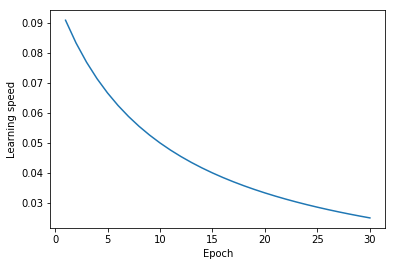

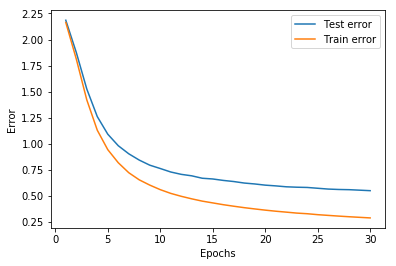

In [16]:
# ======Learning speed=======#
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learn_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.show()

# ==============Plotting error =======#


plt.plot(epoch, loss_test)
plt.xlabel('Epochs')
plt.plot(epoch, loss_train)
plt.ylabel('Error')
plt.legend(['Test error', 'Train error'])

In [17]:
#=== Two Hidden layers ====#

loss_test=[]
acc_test=[]
learn_rate=[]
loss_train=[]
acc_train=[]

model2=task2_b1()
history2=model2.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2, callbacks=callbacks_list2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 0s - loss: 2.3238 - acc: 0.0880 - val_loss: 2.3082 - val_acc: 0.1000
Epoch 2/30
 - 0s - loss: 2.3249 - acc: 0.0840 - val_loss: 2.3102 - val_acc: 0.1000
Epoch 3/30
 - 0s - loss: 2.3221 - acc: 0.1140 - val_loss: 2.3184 - val_acc: 0.1000
Epoch 4/30
 - 0s - loss: 2.3257 - acc: 0.0930 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 5/30
 - 0s - loss: 2.3164 - acc: 0.0980 - val_loss: 2.3233 - val_acc: 0.1000
Epoch 6/30
 - 0s - loss: 2.3164 - acc: 0.0940 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 7/30
 - 0s - loss: 2.3117 - acc: 0.1100 - val_loss: 2.3052 - val_acc: 0.1520
Epoch 8/30
 - 0s - loss: 2.3094 - acc: 0.1050 - val_loss: 2.3048 - val_acc: 0.1060
Epoch 9/30
 - 0s - loss: 2.3022 - acc: 0.1140 - val_loss: 2.2889 - val_acc: 0.1260
Epoch 10/30
 - 0s - loss: 2.2845 - acc: 0.1470 - val_loss: 2.2664 - val_acc: 0.1090
Epoch 11/30
 - 0s - loss: 2.2502 - acc: 0.1920 - val_loss: 2.2251 - val_acc: 0.2030
Epoch 12/30
 - 0s - loss: 2.1795 - ac

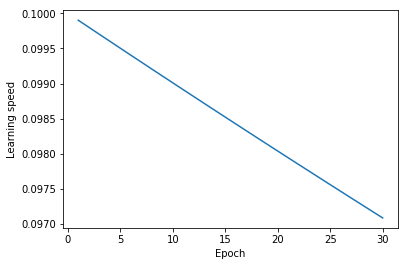

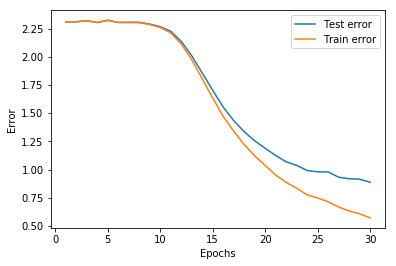

In [18]:
plt.plot(epoch, learn_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.show()

# Plotting error 
#Test error 
plt.plot(epoch, loss_test)
plt.xlabel('Epochs')
plt.plot(epoch, loss_train)
plt.ylabel('Error')
plt.legend(['Test error', 'Train error'])

In [19]:
#===Three Hidden layers ====#

loss_test=[]
acc_test=[]
learn_rate=[]
loss_train=[]
acc_train=[]

model3=task2_b2()
history3=model3.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2, callbacks=callbacks_list1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________


/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 0s - loss: 2.3131 - acc: 0.0820 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 2/30
 - 0s - loss: 2.3052 - acc: 0.0790 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/30
 - 0s - loss: 2.3040 - acc: 0.0830 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/30
 - 0s - loss: 2.3036 - acc: 0.0870 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 5/30
 - 0s - loss: 2.3034 - acc: 0.0860 - val_loss: 2.3026 - val_acc: 0.0990
Epoch 6/30
 - 0s - loss: 2.3032 - acc: 0.0830 - val_loss: 2.3026 - val_acc: 0.1100
Epoch 7/30
 - 0s - loss: 2.3032 - acc: 0.0790 - val_loss: 2.3026 - val_acc: 0.1060
Epoch 8/30
 - 0s - loss: 2.3031 - acc: 0.0800 - val_loss: 2.3026 - val_acc: 0.1030
Epoch 9/30
 - 0s - loss: 2.3030 - acc: 0.0830 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/30
 - 0s - loss: 2.3030 - acc: 0.0800 - val_loss: 2.3026 - val_acc: 0.0970
Epoch 11/30
 - 0s - loss: 2.3029 - acc: 0.0950 - val_loss: 2.3026 - val_acc: 0.0980
Epoch 12/30
 - 0s - loss: 2.3029 - ac

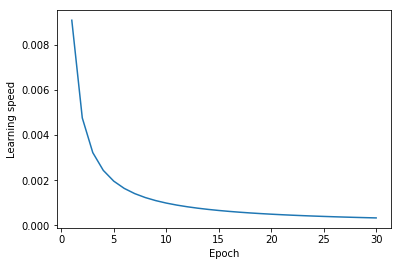

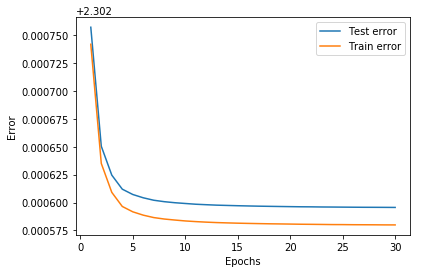

In [20]:
plt.plot(epoch, learn_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.show()

# Plotting error 
#Test error 
plt.plot(epoch, loss_test)
plt.xlabel('Epochs')
plt.plot(epoch, loss_train)
plt.ylabel('Error')
plt.legend(['Test error', 'Train error'])

In [21]:
#===One layer with L2 =====#

loss_test=[]
acc_test=[]
learn_rate=[]
loss_train=[]
acc_train=[]

model4=task2_b3()
history4=model4.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2, callbacks=callbacks_list1)

/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.2156 - acc: 0.0920 - val_loss: 2.3088 - val_acc: 0.1000
Epoch 2/30
 - 0s - loss: 2.3253 - acc: 0.0920 - val_loss: 2.3190 - val_acc: 0.1000
Epoch 3/30
 - 0s - loss: 2.3238 - acc: 0.0910 - val_loss: 2.3131 - val_acc: 0.1000
Epoch 4/30
 - 0s - loss: 2.3216 - acc: 0.1040 - val_loss: 2.3074 - val_acc: 0.1000
Epoch 5/30
 - 0s - loss: 2.3183 - acc: 0.1000 - val_loss: 2.3142 - val_acc: 0.1000
Epoch 6/30
 - 0s - loss: 2.3188 - acc: 0.0790 - val_loss: 2.3141 - val_

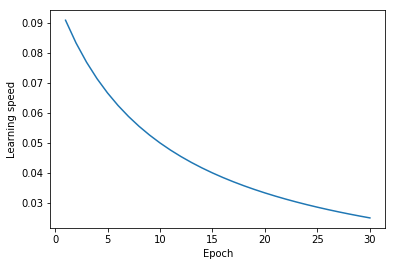

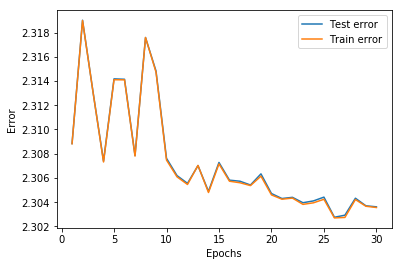

In [22]:
plt.plot(epoch, learn_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.show()

# Plotting error 
#Test error 
plt.plot(epoch, loss_test)
plt.xlabel('Epochs')
plt.plot(epoch, loss_train)
plt.ylabel('Error')
plt.legend(['Test error', 'Train error'])

In [23]:
#=== Two layers with L2 =====#

loss_test=[]
acc_test=[]
learn_rate=[]
loss_train=[]
acc_train=[]

model5=task2_b4()
history5=model5.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2, callbacks=callbacks_list1)

/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.3695 - acc: 0.0830 - val_loss: 2.3266 - val_acc: 0.1000
Epoch 2/30
 - 1s - loss: 2.3222 - acc: 0.0920 - val_loss: 2.3129 - val_acc: 0.1000
Epoch 3/30
 - 0s - loss: 2.3260 - acc: 0.0950 - val_loss: 2.3161 - val_acc: 0.1000
Epoch 4/30
 - 0s - loss: 2.3264 - acc: 0.0950 - val_loss: 2.3081 - val_acc: 0.1000
Epoch 5/30
 - 0s - los

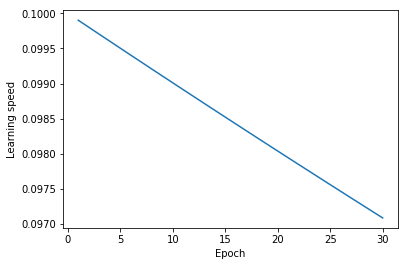

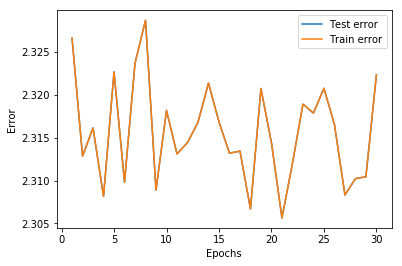

In [24]:
plt.plot(epoch, learn_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.show()

# Plotting error 
#Test error 
plt.plot(epoch, loss_test)
plt.xlabel('Epochs')
plt.plot(epoch, loss_train)
plt.ylabel('Error')
plt.legend(['Test error', 'Train error'])

In [25]:
#===== THree hidden layers with L2 ======#
loss_test=[]
acc_test=[]
learn_rate=[]
loss_train=[]
acc_train=[]

model6=task2_b5()
history6=model6.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2, callbacks=callbacks_list1)

/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/charan69/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_16 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_17 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.5179 - acc: 0.0860 - val_loss: 2.3225 - val_acc: 0.1000
Epoch 2/30
 - 0s - loss: 2.3262 - acc: 0.1030 - val_loss: 2.3192 - val_acc: 0.1000
Epoch 3/30
 - 0s - loss: 2.3299 - acc: 0.0850 - val_loss

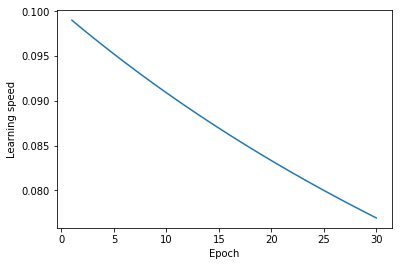

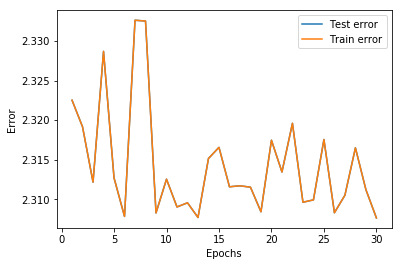

In [26]:

plt.plot(epoch, learn_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.show()

# Plotting error 
#Test error 
plt.plot(epoch, loss_test)
plt.xlabel('Epochs')
plt.plot(epoch, loss_train)
plt.ylabel('Error')
plt.legend(['Test error', 'Train error'])

In [27]:
scores1 = model1.evaluate(X_test, y_test, verbose=0)
scores2 = model2.evaluate(X_test, y_test, verbose=0)
scores3 = model3.evaluate(X_test, y_test, verbose=0)
scores4 = model4.evaluate(X_test, y_test, verbose=0)
scores5 = model5.evaluate(X_test, y_test, verbose=0)
scores6 = model6.evaluate(X_test, y_test, verbose=0)

In [28]:
scores1

[0.5483723101615906, 0.823]

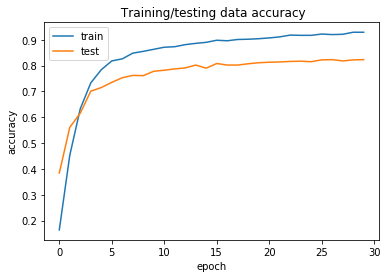

In [29]:
# ===== 2(a) ====== #
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


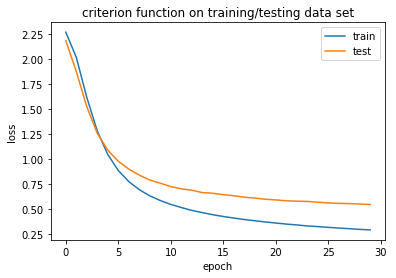

In [30]:

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

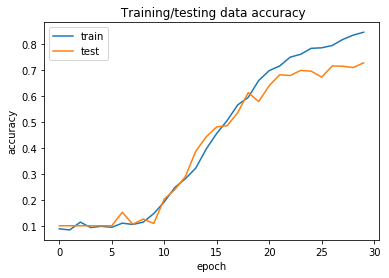

In [31]:
# ===== Two Hidden Layer 2(b) ====== #
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



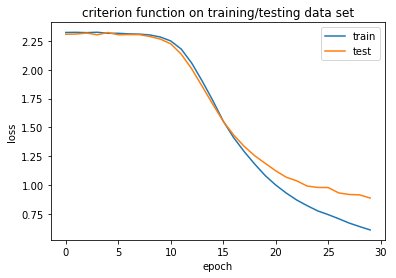

In [32]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

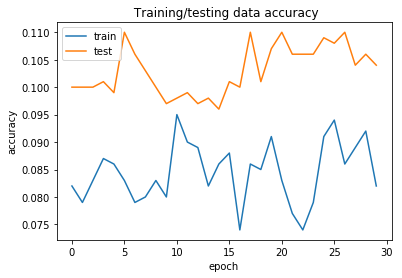

In [33]:
# =========== Three Hidden Layer 2(b) ====== #

plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



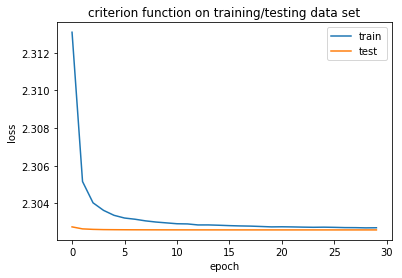

In [34]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

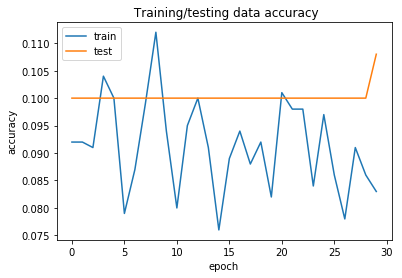

In [35]:
#============ Single layer with l2 and lambda=5 2(b)  ========#

plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



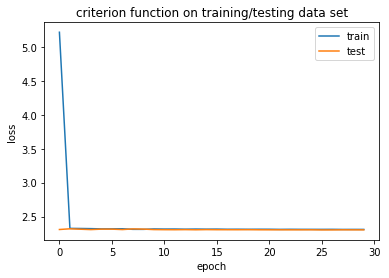

In [36]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

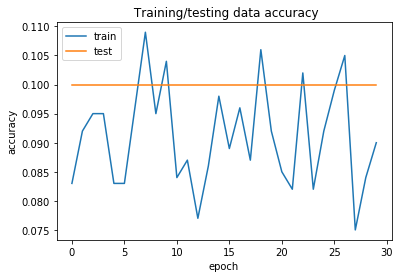

In [37]:
#============ Two hidden layer with l2 and lambda=5 2(b)  ========#

plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



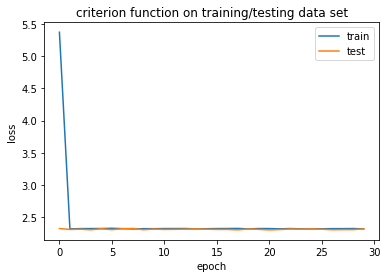

In [38]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

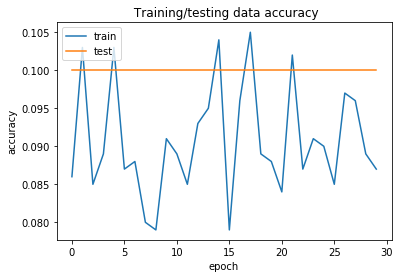

In [39]:
#============ Three hidden layer with l2 and lambda=5 2(b)  ========#

plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



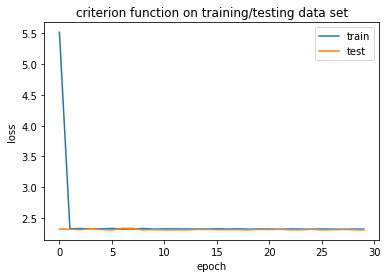

In [40]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()